In [22]:
#Generated by Mahdi, 2023/10/01
import numpy as np
import ast
import numba as nb
import math as m
import sys
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image

In [2]:
#Code of name concatenator for the output images
def nameMaker(imagePath,appendName):
  name1 = imagePath.split("/")
  name2 = name1[-1].split(".")
  finalName = name2[0] + appendName
  return finalName


Enter image_name and scale:img1.JPG 0.7


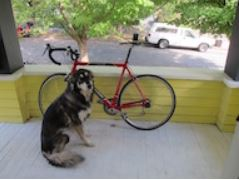

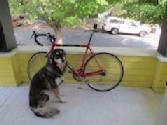

True

In [ ]:
#Code for Nearest neighbour interpolation
# give the inputs sepertaed by space as below:
# image_name scale

#1/2x downsampling of the image example: img1.JPG 0.5
#4x upsampling of the image example: img1.JPG 4

#Note: you can enter any number you want for the scale even float numbers.

def nearestNeighbourInterpolation(imgName,scale):
  img = cv.imread(imgName)
  scale = float(scale)
  k1 = m.floor(scale*img.shape[0])
  k2 = m.floor(scale*img.shape[1])
  d = np.zeros((k1,k2,3))

  for l in range(3):
    for j in range(d.shape[1]):
      for i in range(d.shape[0]):
        i1 = m.floor(i/scale)
        j1 = m.floor(j/scale)
        d[i,j,l] = img[i1,j1,l]

  cv2_imshow(img)
  cv2_imshow(d)
  imgOut = d
  return imgOut


imgName, scale = input("Enter image_name and scale:").split()
cv.imwrite(nameMaker(imgName,"_NNI.jpg"),nearestNeighbourInterpolation(imgName,scale))

Enter image_name and scale:img1.JPG 1.65


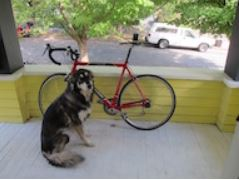

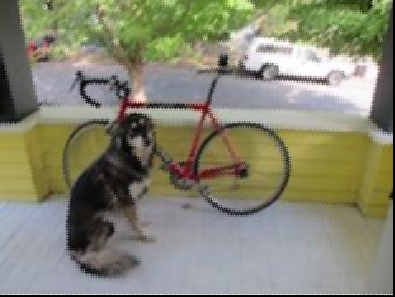

True

In [ ]:
#Code for Bilinear interpolation
def bilinearFilter(imgName,scale):

  img = cv.imread(imgName)
  scale = float(scale)
  k1 = m.ceil((scale)*img.shape[0])
  k2 = m.ceil((scale)*img.shape[1])
  d = np.zeros((k1,k2,3))
  for l in range(3):
    for j in range(d.shape[1]-2):
      for i in range(d.shape[0]-2):
        x = i/scale
        y = j/scale

        xf = m.floor(x)
        xc = m.floor(x)+1
        yf = m.floor(y)
        yc = m.floor(y)+1

        A1 = (xc-x)/(xc-xf)
        A2 = (x-xf)/(xc-xf)
        A3 = (yc-y)/(yc-yf)
        A4 = (y-yf)/(yc-yf)

        d[i,j,l] = A3*A1*img[xf,yf,l] + A3*A2*img[xf,yc,l] + A4*A1*img[xc,yf,l] + A4*A2*img[xc,yc,l]

  cv2_imshow(img)
  cv2_imshow(d)

  imgOut = d
  return imgOut


imgName, scale = input("Enter image_name and scale:").split()
cv.imwrite(nameMaker(imgName,"_BLF_US.jpg"),bilinearFilter(imgName,scale))

Enter the kernel:[[1, 0, -1],[1, 0, -1],[1, 0, -1]]
Enter the image_name:img1.JPG


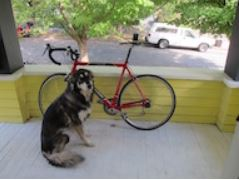

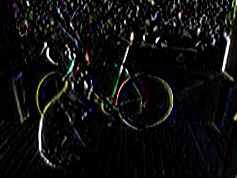

True

In [16]:
#code for convolution filters
def convFilter(imgName,kernel):
  img = cv.imread(imgName)
  kernel = np.array(kernel)
  k1 = kernel.shape[0]
  k2 = kernel.shape[1]
  d = np.zeros((img.shape[0]-k1+1,img.shape[1]-k2+1,3))

  for l in range(d.shape[2]):
    for j in range(d.shape[1]):
      for i in range(d.shape[0]):
        d[i,j,l] = np.sum(img[i:i+k1,j:j+k2,l]*kernel)

  imgOut = d
  cv2_imshow(img)
  cv2_imshow(imgOut)

  return imgOut


kernelAslist =  ast.literal_eval(input("Enter the kernel:"))
imgName = input("Enter the image_name:")
cv.imwrite(nameMaker(imgName,"_ConvF.jpg"),convFilter(imgName,kernelAslist))

Enter the image name m and n: img2.JPG 5 5


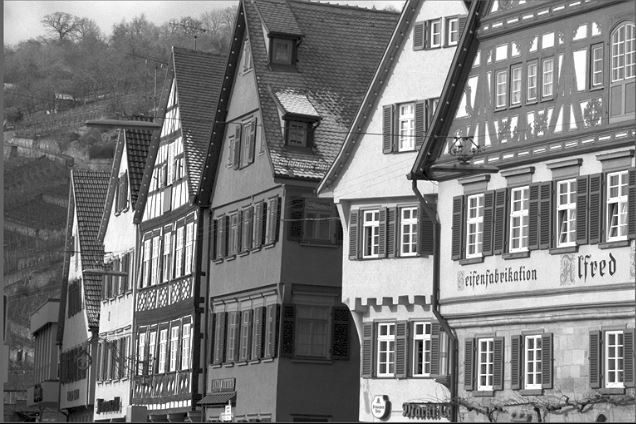

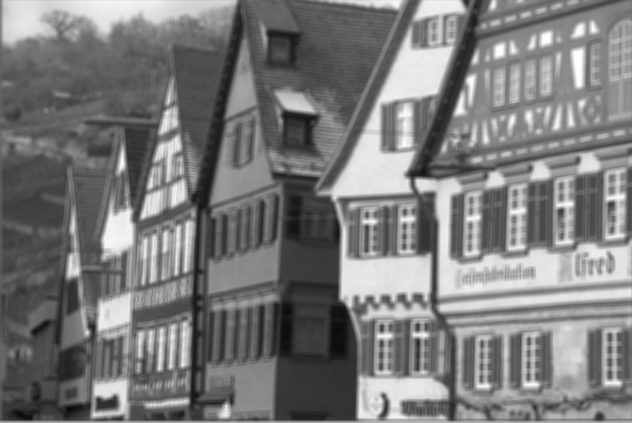

True

In [13]:
#code for box filter
def boxFilter(imgName,m,n):
  m = int(m)
  n = int(n)
  kernel = np.ones((m,n))/(m*n)
  return convFilter(imgName,kernel)


imgName,m,n = input("Enter the image name m and n: ").split()
cv.imwrite(nameMaker(imgName,"_boxF.jpg"),boxFilter(imgName,m,n))

In [26]:
#Code for Bilateral Filter

def gausianKernelCal(sigma):
  a = 6*sigma
  a = m.ceil(a)
  n = a+1 if a%2==0 else a
  x = y = np.arange(-(n-1)/2,n/2)
  X,Y = np.meshgrid(x,y,sparse=True)
  g = np.exp(-(X**2 + Y**2)/(2*sigma**2))
  g = g/g.sum()
  kernel = g
  return kernel
